In [15]:
import numpy as np 
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

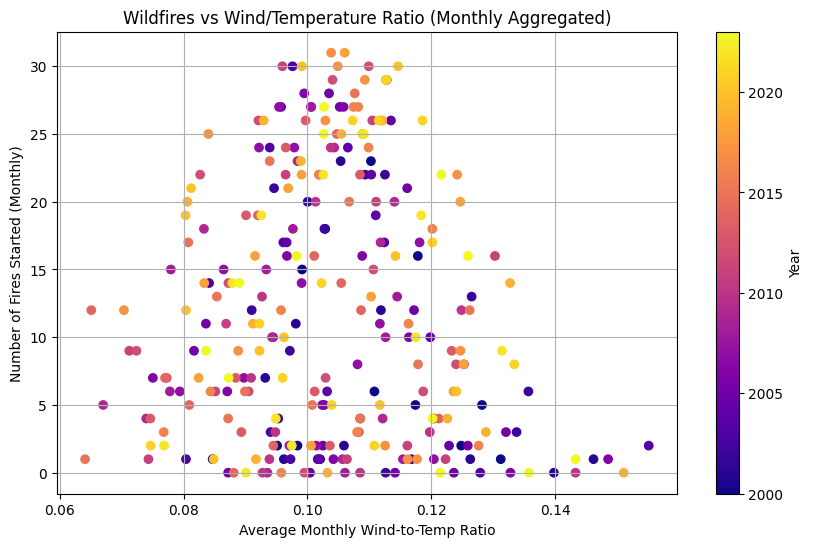

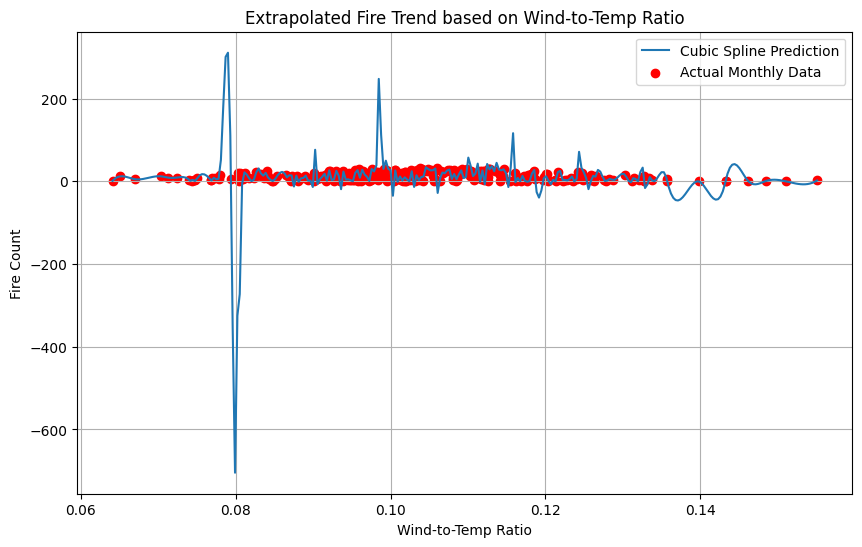

In [16]:
df = pd.read_csv('CA_Weather_Fire_Dataset_1984-2025.csv')  

df.columns = [
    'DATE', 'PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED',
    'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH',
    'SEASON', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'DAY_OF_YEAR'
]

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

df.dropna(inplace=True)


monthly = df.groupby(['YEAR', 'MONTH']).agg({
    'WIND_TEMP_RATIO': 'mean',
    'FIRE_START_DAY': 'sum'
}).reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(monthly['WIND_TEMP_RATIO'], monthly['FIRE_START_DAY'], c=monthly['YEAR'], cmap='plasma')
plt.colorbar(label='Year')
plt.xlabel('Average Monthly Wind-to-Temp Ratio')
plt.ylabel('Number of Fires Started (Monthly)')
plt.title('Wildfires vs Wind/Temperature Ratio (Monthly Aggregated)')
plt.grid(True)
plt.show()

x = monthly['WIND_TEMP_RATIO']
y = monthly['FIRE_START_DAY']
sorted_idx = np.argsort(x)
x_sorted = x.iloc[sorted_idx]
y_sorted = y.iloc[sorted_idx]

cs = CubicSpline(x_sorted, y_sorted, extrapolate=True)

x_pred = np.linspace(x.min(), x.max(), 300)
y_pred = cs(x_pred)

plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_pred, label='Cubic Spline Prediction')
plt.scatter(x, y, color='red', label='Actual Monthly Data')
plt.xlabel('Wind-to-Temp Ratio')
plt.ylabel('Fire Count')
plt.title('Extrapolated Fire Trend based on Wind-to-Temp Ratio')
plt.legend()
plt.grid(True)
plt.show()

 

C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\4245371094.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('MAX_TEMP_BIN').agg({


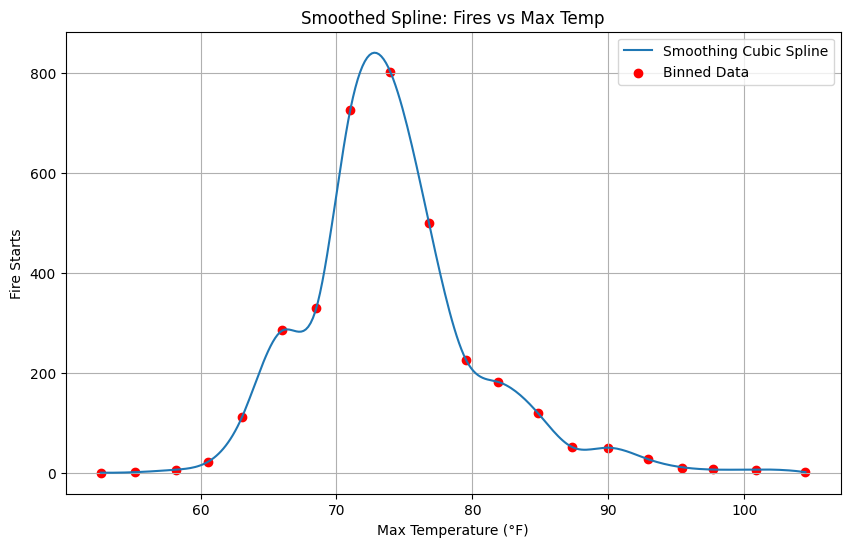

In [ ]:
df['MAX_TEMP_BIN'] = pd.cut(df['MAX_TEMP'], bins=20)
grouped = df.groupby('MAX_TEMP_BIN').agg({
    'MAX_TEMP': 'mean',
    'FIRE_START_DAY': 'sum'
}).dropna()

# Get binned x and y values
x = grouped['MAX_TEMP'].values
y = grouped['FIRE_START_DAY'].values

# Fit smoothing spline
spline = UnivariateSpline(x, y, s=10)

# Predict over a range
x_pred = np.linspace(x.min(), x.max(), 300)
y_pred = spline(x_pred)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_pred, label='Smoothing Cubic Spline')
plt.scatter(x, y, color='red', label='Binned Data')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Fire Starts')
plt.title('Smoothed Spline: Fires vs Max Temp')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\1048227039.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('MAX_TEMP_BIN').agg({


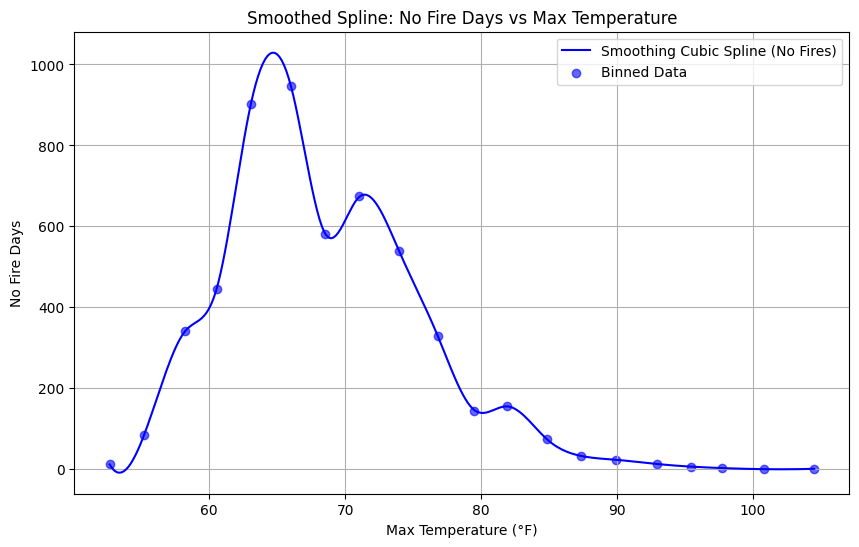

In [18]:
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)
df['MAX_TEMP_BIN'] = pd.cut(df['MAX_TEMP'], bins=20)

grouped = df.groupby('MAX_TEMP_BIN').agg({
    'MAX_TEMP': 'mean',
    'FIRE_START_DAY': ['sum', 'count'] 
}).dropna()

grouped.columns = ['MAX_TEMP', 'FIRE_COUNT', 'TOTAL_COUNT']
grouped['NO_FIRE_COUNT'] = grouped['TOTAL_COUNT'] - grouped['FIRE_COUNT']

# Get binned x and y values
x = grouped['MAX_TEMP'].values
y = grouped['NO_FIRE_COUNT'].values

# Fit smoothing spline
spline = UnivariateSpline(x, y, s=20)

# Predict over a range
x_pred = np.linspace(x.min(), x.max(), 300)
y_pred = spline(x_pred)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_pred, label='Smoothing Cubic Spline (No Fires)', color='blue')
plt.scatter(x, y, color='blue', alpha=0.6, label='Binned Data')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('No Fire Days')
plt.title('Smoothed Spline: No Fire Days vs Max Temperature')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\1305099485.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('MAX_TEMP_BIN').agg({


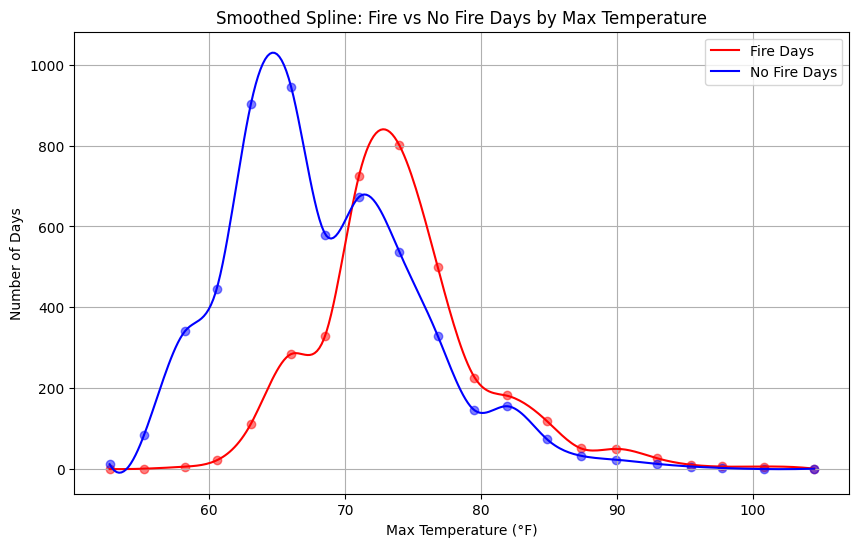

In [19]:
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)
df['MAX_TEMP_BIN'] = pd.cut(df['MAX_TEMP'], bins=20)

grouped = df.groupby('MAX_TEMP_BIN').agg({
    'MAX_TEMP': 'mean',
    'FIRE_START_DAY': ['sum', 'count'] 
}).dropna()

grouped.columns = ['MAX_TEMP', 'FIRE_COUNT', 'TOTAL_COUNT']
grouped['NO_FIRE_COUNT'] = grouped['TOTAL_COUNT'] - grouped['FIRE_COUNT']

x = grouped['MAX_TEMP'].values
y_fire = grouped['FIRE_COUNT'].values
y_no_fire = grouped['NO_FIRE_COUNT'].values

spline_fire = UnivariateSpline(x, y_fire, s=10)
spline_no_fire = UnivariateSpline(x, y_no_fire, s=10)

x_pred = np.linspace(x.min(), x.max(), 300)
y_pred_fire = spline_fire(x_pred)
y_pred_no_fire = spline_no_fire(x_pred)

plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_pred_fire, label='Fire Days', color='red')
plt.plot(x_pred, y_pred_no_fire, label='No Fire Days', color='blue')
plt.scatter(x, y_fire, color='red', alpha=0.5)
plt.scatter(x, y_no_fire, color='blue', alpha=0.5)

plt.xlabel('Max Temperature (°F)')
plt.ylabel('Number of Days')
plt.title('Smoothed Spline: Fire vs No Fire Days by Max Temperature')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\1333379351.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_wind = df.groupby('WIND_BIN').agg({


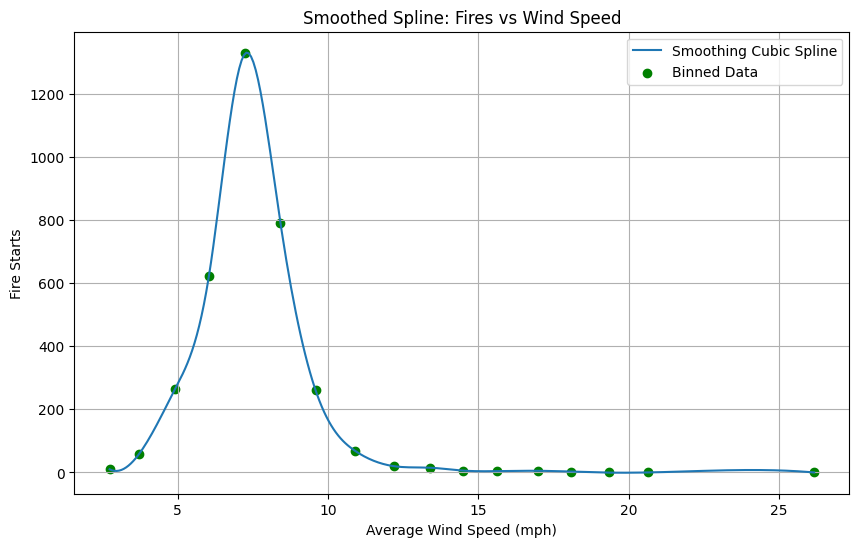

In [20]:
df['WIND_BIN'] = pd.cut(df['AVG_WIND_SPEED'], bins=20)
grouped_wind = df.groupby('WIND_BIN').agg({
    'AVG_WIND_SPEED': 'mean',
    'FIRE_START_DAY': 'sum'
}).dropna()

# Extract data
x_wind = grouped_wind['AVG_WIND_SPEED'].values
y_fires = grouped_wind['FIRE_START_DAY'].values

# Fit smoothing spline
spline_wind = UnivariateSpline(x_wind, y_fires, s=5)

# Generate predictions
x_pred = np.linspace(x_wind.min(), x_wind.max(), 300)
y_pred = spline_wind(x_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_pred, label='Smoothing Cubic Spline')
plt.scatter(x_wind, y_fires, color='green', label='Binned Data')
plt.xlabel('Average Wind Speed (mph)')
plt.ylabel('Fire Starts')
plt.title('Smoothed Spline: Fires vs Wind Speed')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\3960654529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_temp = df.groupby('MAX_TEMP_BIN').agg({
C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\3960654529.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_wind = df.groupby('WIND_BIN').agg({


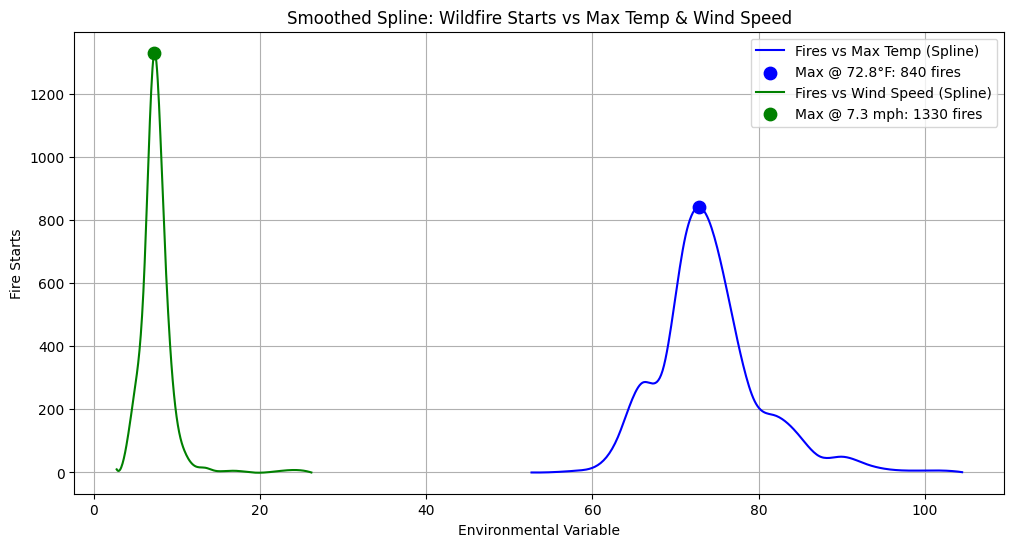

Max fire starts based on Max Temp: 840 at 72.8°F
Max fire starts based on Wind Speed: 1330 at 7.3 mph


In [21]:
df['MAX_TEMP_BIN'] = pd.cut(df['MAX_TEMP'], bins=20)
grouped_temp = df.groupby('MAX_TEMP_BIN').agg({
    'MAX_TEMP': 'mean',
    'FIRE_START_DAY': 'sum'
}).dropna()

x_temp = grouped_temp['MAX_TEMP'].values
y_temp = grouped_temp['FIRE_START_DAY'].values

spline_temp = UnivariateSpline(x_temp, y_temp, s=10)
x_temp_pred = np.linspace(x_temp.min(), x_temp.max(), 300)
y_temp_pred = spline_temp(x_temp_pred)

max_idx_temp = np.argmax(y_temp_pred)
max_x_temp = x_temp_pred[max_idx_temp]
max_y_temp = y_temp_pred[max_idx_temp]

df['WIND_BIN'] = pd.cut(df['AVG_WIND_SPEED'], bins=20)
grouped_wind = df.groupby('WIND_BIN').agg({
    'AVG_WIND_SPEED': 'mean',
    'FIRE_START_DAY': 'sum'
}).dropna()

x_wind = grouped_wind['AVG_WIND_SPEED'].values
y_wind = grouped_wind['FIRE_START_DAY'].values

spline_wind = UnivariateSpline(x_wind, y_wind, s=5)
x_wind_pred = np.linspace(x_wind.min(), x_wind.max(), 300)
y_wind_pred = spline_wind(x_wind_pred)

max_idx_wind = np.argmax(y_wind_pred)
max_x_wind = x_wind_pred[max_idx_wind]
max_y_wind = y_wind_pred[max_idx_wind]


plt.figure(figsize=(12, 6))

plt.plot(x_temp_pred, y_temp_pred, label='Fires vs Max Temp (Spline)', color='blue')
plt.scatter(max_x_temp, max_y_temp, color='blue', marker='o', s=80, label=f'Max @ {max_x_temp:.1f}°F: {max_y_temp:.0f} fires')

plt.plot(x_wind_pred, y_wind_pred, label='Fires vs Wind Speed (Spline)', color='green')
plt.scatter(max_x_wind, max_y_wind, color='green', marker='o', s=80, label=f'Max @ {max_x_wind:.1f} mph: {max_y_wind:.0f} fires')

plt.title('Smoothed Spline: Wildfire Starts vs Max Temp & Wind Speed')
plt.xlabel('Environmental Variable')
plt.ylabel('Fire Starts')
plt.legend()
plt.grid(True)
plt.show()

# --- PRINT MAXES ---
print(f"Max fire starts based on Max Temp: {max_y_temp:.0f} at {max_x_temp:.1f}°F")
print(f"Max fire starts based on Wind Speed: {max_y_wind:.0f} at {max_x_wind:.1f} mph")





C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\2339241216.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('WIND_BIN').agg({


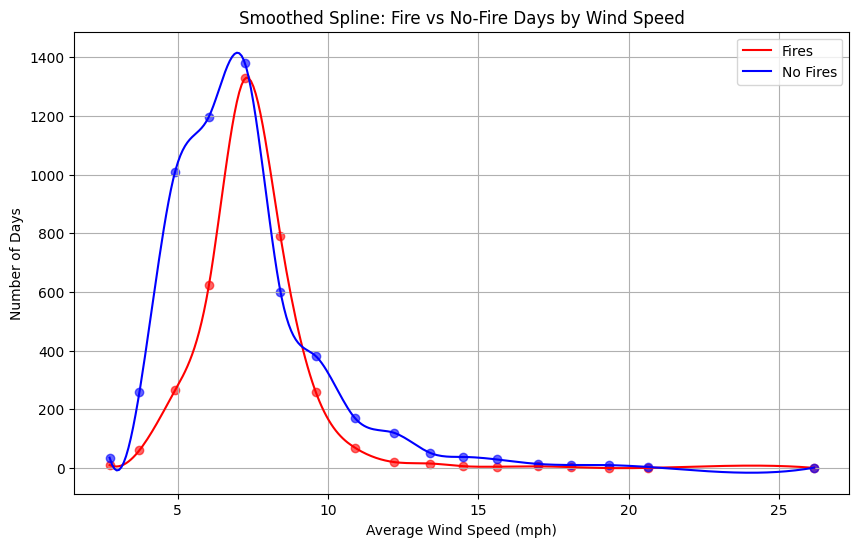

In [22]:

df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)

df['WIND_BIN'] = pd.cut(df['AVG_WIND_SPEED'], bins=20)

grouped = df.groupby('WIND_BIN').agg({
    'AVG_WIND_SPEED': 'mean',
    'FIRE_START_DAY': ['sum', 'count']
}).dropna()

grouped.columns = ['AVG_WIND_SPEED', 'FIRE_COUNT', 'TOTAL_COUNT']
grouped['NO_FIRE_COUNT'] = grouped['TOTAL_COUNT'] - grouped['FIRE_COUNT']

x = grouped['AVG_WIND_SPEED'].values
fires_y = grouped['FIRE_COUNT'].values
no_fires_y = grouped['NO_FIRE_COUNT'].values

spline_fires = UnivariateSpline(x, fires_y, s=5)
spline_no_fires = UnivariateSpline(x, no_fires_y, s=5)

x_pred = np.linspace(x.min(), x.max(), 300)
y_fires_pred = spline_fires(x_pred)
y_no_fires_pred = spline_no_fires(x_pred)

plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_fires_pred, label='Fires', color='red')
plt.plot(x_pred, y_no_fires_pred, label='No Fires', color='blue')
plt.scatter(x, fires_y, color='red', alpha=0.6)
plt.scatter(x, no_fires_y, color='blue', alpha=0.6)
plt.xlabel('Average Wind Speed (mph)')
plt.ylabel('Number of Days')
plt.title('Smoothed Spline: Fire vs No-Fire Days by Wind Speed')
plt.legend()
plt.grid(True)
plt.show()


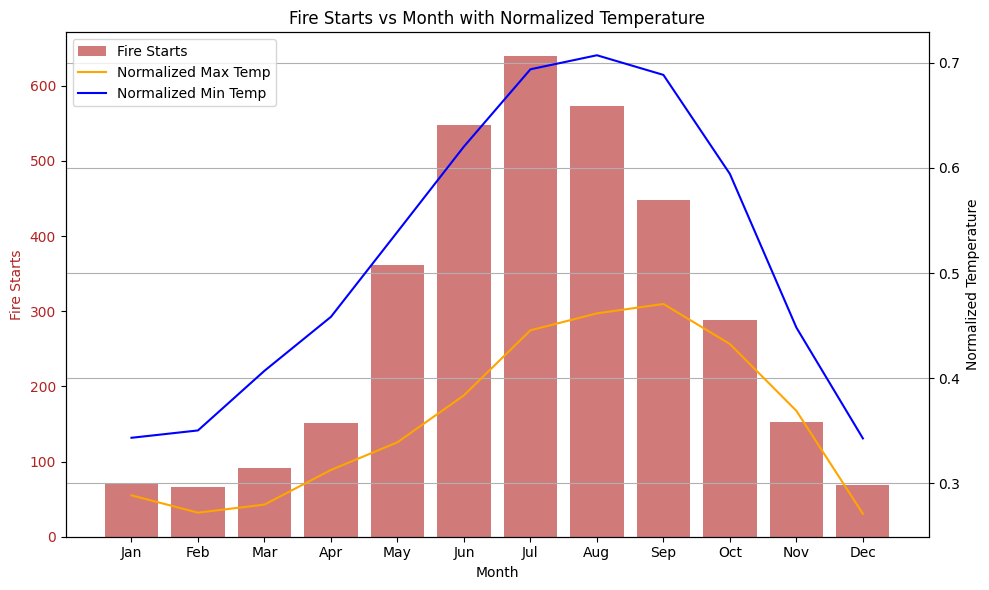

In [23]:
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)

# Normalize MAX_TEMP and MIN_TEMP using min-max scaling
df['MAX_TEMP_NORM'] = (df['MAX_TEMP'] - df['MAX_TEMP'].min()) / (df['MAX_TEMP'].max() - df['MAX_TEMP'].min())
df['MIN_TEMP_NORM'] = (df['MIN_TEMP'] - df['MIN_TEMP'].min()) / (df['MIN_TEMP'].max() - df['MIN_TEMP'].min())

monthly = df.groupby('MONTH').agg({
    'FIRE_START_DAY': 'sum',
    'MAX_TEMP_NORM': 'mean',
    'MIN_TEMP_NORM': 'mean'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Fire counts
ax1.bar(monthly['MONTH'], monthly['FIRE_START_DAY'], color='firebrick', alpha=0.6, label='Fire Starts')
ax1.set_ylabel('Fire Starts', color='firebrick')
ax1.set_xlabel('Month')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.tick_params(axis='y', labelcolor='firebrick')

ax2 = ax1.twinx()
ax2.plot(monthly['MONTH'], monthly['MAX_TEMP_NORM'], color='orange', label='Normalized Max Temp')
ax2.plot(monthly['MONTH'], monthly['MIN_TEMP_NORM'], color='blue', label='Normalized Min Temp')
ax2.set_ylabel('Normalized Temperature')
ax2.tick_params(axis='y')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Fire Starts vs Month with Normalized Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\1095868560.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('LAGGED_PRECIP_BIN').agg({


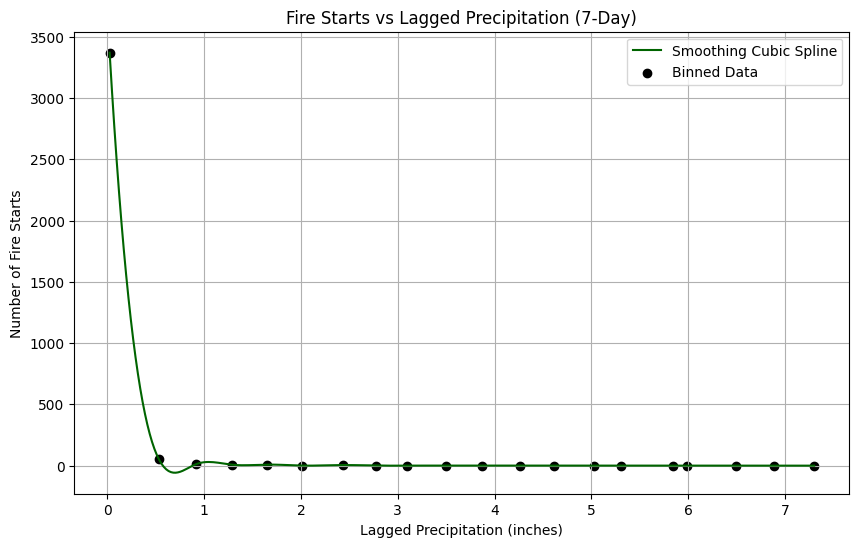

In [24]:
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)
df['LAGGED_PRECIP_BIN'] = pd.cut(df['LAGGED_PRECIPITATION'], bins=20)

grouped = df.groupby('LAGGED_PRECIP_BIN').agg({
    'LAGGED_PRECIPITATION': 'mean',
    'FIRE_START_DAY': 'sum'
}).dropna()

x = grouped['LAGGED_PRECIPITATION'].values
y = grouped['FIRE_START_DAY'].values

spline = UnivariateSpline(x, y, s=5)

x_pred = np.linspace(x.min(), x.max(), 300)
y_pred = spline(x_pred)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_pred, label='Smoothing Cubic Spline', color='darkgreen')
plt.scatter(x, y, color='black', label='Binned Data')
plt.xlabel('Lagged Precipitation (inches)')
plt.ylabel('Number of Fire Starts')
plt.title('Fire Starts vs Lagged Precipitation (7-Day)')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\2306475180.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('LAGGED_PRECIP_BIN').agg({


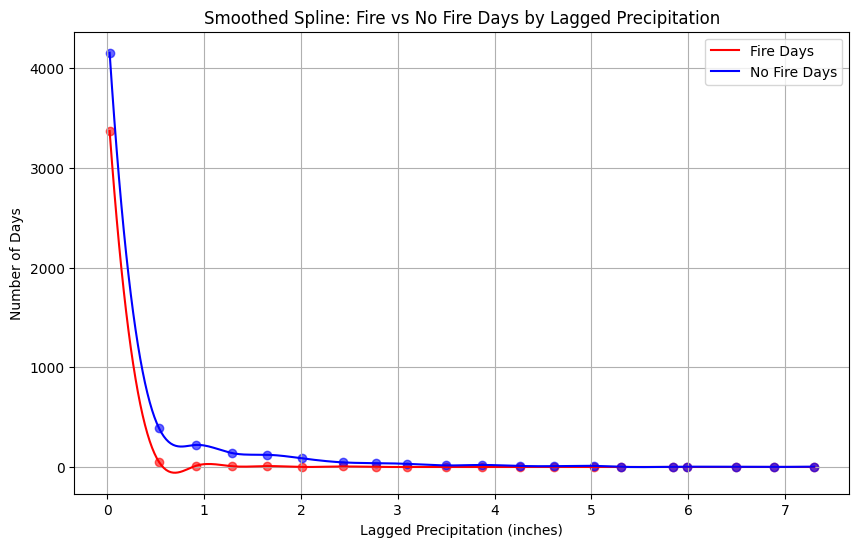

In [25]:
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)

df['LAGGED_PRECIP_BIN'] = pd.cut(df['LAGGED_PRECIPITATION'], bins=20)

# Group and count fire + no fire days
grouped = df.groupby('LAGGED_PRECIP_BIN').agg({
    'LAGGED_PRECIPITATION': 'mean',
    'FIRE_START_DAY': ['sum', 'count']  # sum = fires, count - sum = no fires
}).dropna()

# Flatten column names
grouped.columns = ['LAGGED_PRECIP', 'FIRE_COUNT', 'TOTAL_COUNT']
grouped['NO_FIRE_COUNT'] = grouped['TOTAL_COUNT'] - grouped['FIRE_COUNT']

# Extract x and y values
x = grouped['LAGGED_PRECIP'].values
y_fires = grouped['FIRE_COUNT'].values
y_no_fires = grouped['NO_FIRE_COUNT'].values

# Fit smoothing splines
spline_fire = UnivariateSpline(x, y_fires, s=5)
spline_no_fire = UnivariateSpline(x, y_no_fires, s=5)

# Predict
x_pred = np.linspace(x.min(), x.max(), 300)
y_fire_pred = spline_fire(x_pred)
y_no_fire_pred = spline_no_fire(x_pred)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_fire_pred, label='Fire Days', color='red')
plt.plot(x_pred, y_no_fire_pred, label='No Fire Days', color='blue')
plt.scatter(x, y_fires, color='red', alpha=0.6)
plt.scatter(x, y_no_fires, color='blue', alpha=0.6)
plt.xlabel('Lagged Precipitation (inches)')
plt.ylabel('Number of Days')
plt.title('Smoothed Spline: Fire vs No Fire Days by Lagged Precipitation')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\2004810790.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.scatter(next_year, next_fire_pred, color='black', label=f'Predicted {next_year}: {int(next_fire_pred)} days with fires')


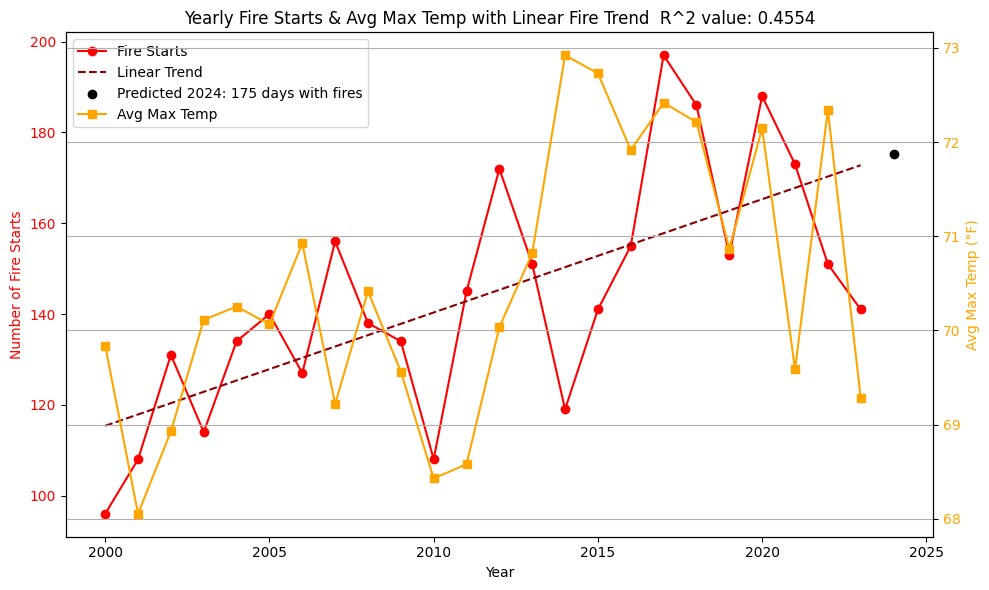

Predicted fire starts in 2024: 175


C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\2004810790.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted fire starts in {next_year}: {int(next_fire_pred)}")


In [26]:
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)

yearly = df.groupby('YEAR').agg({
    'FIRE_START_DAY': 'sum',
    'MAX_TEMP': 'mean'
}).reset_index()

X = yearly['YEAR'].values.reshape(-1, 1)
y_fires = yearly['FIRE_START_DAY'].values
y_temp = yearly['MAX_TEMP'].values

model = LinearRegression()
model.fit(X, y_fires)
y_pred = model.predict(X)

next_year = X[-1][0] + 1
next_fire_pred = model.predict([[next_year]])

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(yearly['YEAR'], y_fires, 'o-', color='red', label='Fire Starts')
ax1.plot(yearly['YEAR'], y_pred, '--', color='darkred', label='Linear Trend')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fire Starts', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax1.scatter(next_year, next_fire_pred, color='black', label=f'Predicted {next_year}: {int(next_fire_pred)} days with fires')

ax2 = ax1.twinx()
ax2.plot(yearly['YEAR'], y_temp, 's-', color='orange', label='Avg Max Temp')
ax2.set_ylabel('Avg Max Temp (°F)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

r_squared_fire = model.score(X, y_fires)

plt.title(f"Yearly Fire Starts & Avg Max Temp with Linear Fire Trend  R^2 value: {r_squared_fire:.4f}")

plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Predicted fire starts in {next_year}: {int(next_fire_pred)}")

C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\3079994018.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = monthly.groupby('ratio_bin').agg({


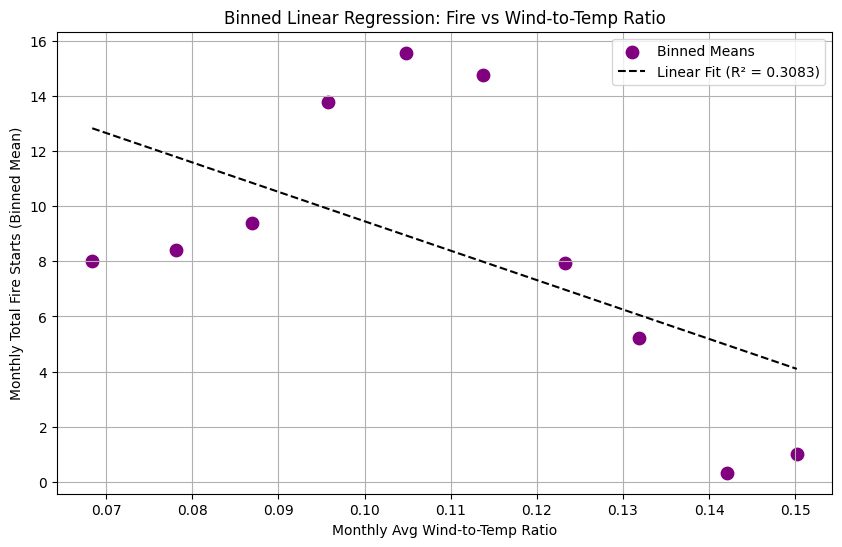

Linear Regression on Binned Fire vs Wind-to-Temp Ratio:
Coefficient: -106.6239, Intercept: 20.1126
R-squared: 0.3083



C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\3079994018.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_temp = yearly_temp.groupby('temp_bin').agg({


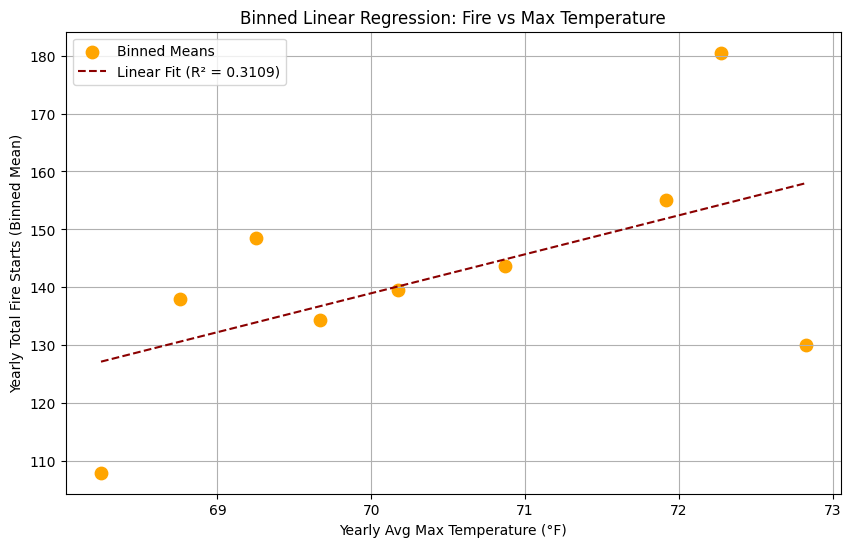

Linear Regression on Binned Fire vs Max Temperature:
Coefficient: 6.7214, Intercept: -331.5109
R-squared: 0.3109



C:\Users\faxy0\AppData\Local\Temp\ipykernel_25408\3079994018.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_precip = monthly_precip.groupby('precip_bin').agg({


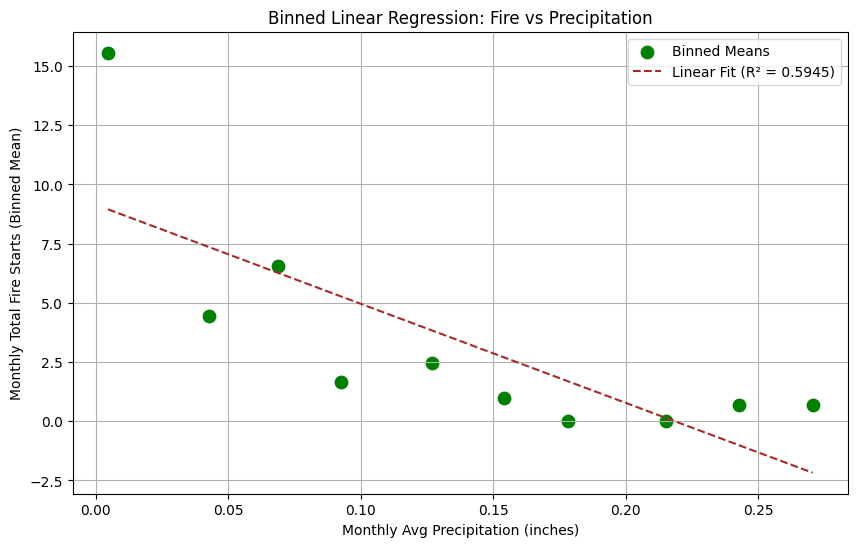

Linear Regression on Binned Fire vs Precipitation:
Coefficient: -41.8518, Intercept: 9.1429
R-squared: 0.5945


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -------------------------------
# Load and clean the dataset
# -------------------------------
df = pd.read_csv('CA_Weather_Fire_Dataset_1984-2025.csv')
df.columns = [
    'DATE', 'PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED',
    'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH',
    'SEASON', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'DAY_OF_YEAR'
]
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(inplace=True)
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)

# =============================================================================
# 1. Linear Regression: FIRE vs WIND-TO-TEMP RATIO (Monthly Aggregated, Binned into 20 Points)
# =============================================================================
monthly = df.groupby(['YEAR', 'MONTH']).agg({
    'WIND_TEMP_RATIO': 'mean',
    'FIRE_START_DAY': 'sum'
}).reset_index()

# Bin the monthly points into 20 groups based on WIND_TEMP_RATIO
monthly['ratio_bin'] = pd.cut(monthly['WIND_TEMP_RATIO'], bins=10)
binned_ratio = monthly.groupby('ratio_bin').agg({
    'WIND_TEMP_RATIO': 'mean',      # mean of the predictor within the bin
    'FIRE_START_DAY': 'mean'         # mean fire starts within the bin (or use sum if desired)
}).dropna().reset_index()

X_binned_ratio = binned_ratio[['WIND_TEMP_RATIO']]
y_binned_ratio = binned_ratio['FIRE_START_DAY']

model_ratio = LinearRegression()
model_ratio.fit(X_binned_ratio, y_binned_ratio)
y_pred_ratio = model_ratio.predict(X_binned_ratio)
r2_ratio = model_ratio.score(X_binned_ratio, y_binned_ratio)

plt.figure(figsize=(10,6))
plt.scatter(X_binned_ratio, y_binned_ratio, color='purple', s=80, label='Binned Means')
plt.plot(X_binned_ratio, y_pred_ratio, '--', color='black', label=f'Linear Fit (R² = {r2_ratio:.4f})')
plt.xlabel('Monthly Avg Wind-to-Temp Ratio')
plt.ylabel('Monthly Total Fire Starts (Binned Mean)')
plt.title('Binned Linear Regression: Fire vs Wind-to-Temp Ratio')
plt.legend()
plt.grid(True)
plt.show()

print("Linear Regression on Binned Fire vs Wind-to-Temp Ratio:")
print(f"Coefficient: {model_ratio.coef_[0]:.4f}, Intercept: {model_ratio.intercept_:.4f}")
print(f"R-squared: {r2_ratio:.4f}\n")


# =============================================================================
# 2. Linear Regression: FIRE vs MAX TEMP (Yearly Aggregated, Binned into 20 Points)
# =============================================================================
yearly_temp = df.groupby('YEAR').agg({
    'FIRE_START_DAY': 'sum',
    'MAX_TEMP': 'mean'
}).reset_index()

# Bin the yearly points into 20 groups by MAX_TEMP
yearly_temp['temp_bin'] = pd.cut(yearly_temp['MAX_TEMP'], bins=10)
binned_temp = yearly_temp.groupby('temp_bin').agg({
    'MAX_TEMP': 'mean',
    'FIRE_START_DAY': 'mean'  # using mean fire starts per bin; sum can be used if preferred
}).dropna().reset_index()

X_binned_temp = binned_temp[['MAX_TEMP']]
y_binned_temp = binned_temp['FIRE_START_DAY']

model_temp = LinearRegression()
model_temp.fit(X_binned_temp, y_binned_temp)
y_pred_temp = model_temp.predict(X_binned_temp)
r2_temp = model_temp.score(X_binned_temp, y_binned_temp)

plt.figure(figsize=(10,6))
plt.scatter(X_binned_temp, y_binned_temp, color='orange', s=80, label='Binned Means')
plt.plot(X_binned_temp, y_pred_temp, '--', color='darkred', label=f'Linear Fit (R² = {r2_temp:.4f})')
plt.xlabel('Yearly Avg Max Temperature (°F)')
plt.ylabel('Yearly Total Fire Starts (Binned Mean)')
plt.title('Binned Linear Regression: Fire vs Max Temperature')
plt.legend()
plt.grid(True)
plt.show()

print("Linear Regression on Binned Fire vs Max Temperature:")
print(f"Coefficient: {model_temp.coef_[0]:.4f}, Intercept: {model_temp.intercept_:.4f}")
print(f"R-squared: {r2_temp:.4f}\n")


# =============================================================================
# 3. Linear Regression: FIRE vs PRECIPITATION (Monthly Aggregated, Binned into 20 Points)
# =============================================================================
monthly_precip = df.groupby(['YEAR', 'MONTH']).agg({
    'PRECIPITATION': 'mean',
    'FIRE_START_DAY': 'sum'
}).reset_index()

# Bin the monthly precipitation data into 20 groups
monthly_precip['precip_bin'] = pd.cut(monthly_precip['PRECIPITATION'], bins=10)
binned_precip = monthly_precip.groupby('precip_bin').agg({
    'PRECIPITATION': 'mean',
    'FIRE_START_DAY': 'mean'  # using mean fire starts per bin
}).dropna().reset_index()

X_binned_precip = binned_precip[['PRECIPITATION']]
y_binned_precip = binned_precip['FIRE_START_DAY']

model_precip = LinearRegression()
model_precip.fit(X_binned_precip, y_binned_precip)
y_pred_precip = model_precip.predict(X_binned_precip)
r2_precip = model_precip.score(X_binned_precip, y_binned_precip)

plt.figure(figsize=(10,6))
plt.scatter(X_binned_precip, y_binned_precip, color='green', s=80, label='Binned Means')
plt.plot(X_binned_precip, y_pred_precip, '--', color='brown', label=f'Linear Fit (R² = {r2_precip:.4f})')
plt.xlabel('Monthly Avg Precipitation (inches)')
plt.ylabel('Monthly Total Fire Starts (Binned Mean)')
plt.title('Binned Linear Regression: Fire vs Precipitation')
plt.legend()
plt.grid(True)
plt.show()

print("Linear Regression on Binned Fire vs Precipitation:")
print(f"Coefficient: {model_precip.coef_[0]:.4f}, Intercept: {model_precip.intercept_:.4f}")
print(f"R-squared: {r2_precip:.4f}")

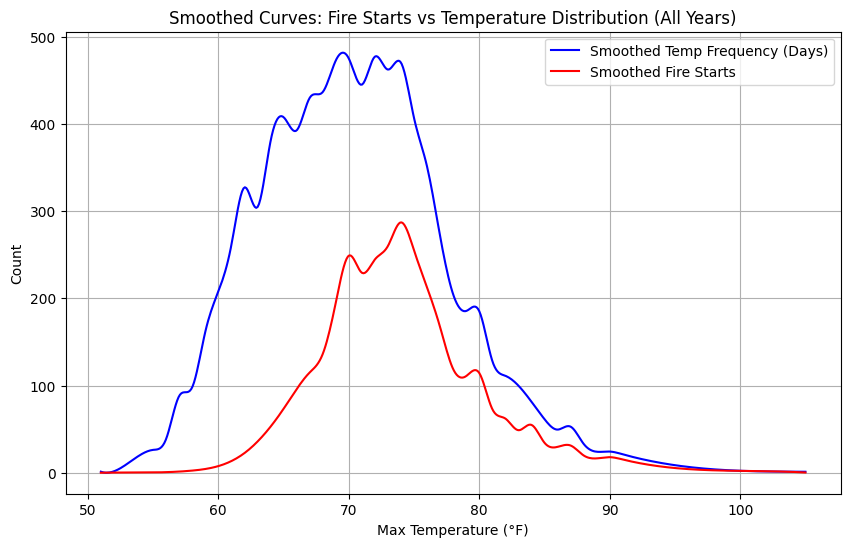

In [27]:
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)
df['TEMP_ROUNDED'] = df['MAX_TEMP'].round()

grouped = df.groupby('TEMP_ROUNDED').agg({
    'FIRE_START_DAY': 'sum',
    'DATE': 'count'
}).rename(columns={'DATE': 'TEMP_FREQ'}).reset_index()


x = grouped['TEMP_ROUNDED'].values
y_fire = grouped['FIRE_START_DAY'].values
y_freq = grouped['TEMP_FREQ'].values

spline_fire = UnivariateSpline(x, y_fire, s=100)
spline_freq = UnivariateSpline(x, y_freq, s=100)

x_pred = np.linspace(x.min(), x.max(), 500)
y_fire_pred = spline_fire(x_pred)
y_freq_pred = spline_freq(x_pred)

plt.figure(figsize=(10, 6))
plt.plot(x_pred, y_freq_pred, label='Smoothed Temp Frequency (Days)', color='blue')
plt.plot(x_pred, y_fire_pred, label='Smoothed Fire Starts', color='red')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Count')
plt.title('Smoothed Curves: Fire Starts vs Temperature Distribution (All Years)')
plt.grid(True)
plt.legend()
plt.show()


In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.api import GLM

# Load and process the dataset
df = pd.read_csv('CA_Weather_Fire_Dataset_1984-2025.csv')
df.columns = [
    'DATE', 'PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED',
    'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH',
    'SEASON', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'DAY_OF_YEAR'
]
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(inplace=True)
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)

# Define predictors and response
X = df[['MAX_TEMP', 'AVG_WIND_SPEED', 'PRECIPITATION']]
y = df['FIRE_START_DAY']
X = sm.add_constant(X)

# Fit Poisson GLM
model = GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print model summary
print(results.summary())

# --- Interpret coefficients ---
print("\nCoefficient Interpretation (Poisson with log link):")
coef_table = results.params
for var, coef in coef_table.items():
    if var != 'const':
        pct_change = (np.exp(coef) - 1) * 100
        print(f"• A one-unit increase in {var} changes expected fire starts by {pct_change:.2f}%")


                 Generalized Linear Model Regression Results                  
Dep. Variable:         FIRE_START_DAY   No. Observations:                 8765
Model:                            GLM   Df Residuals:                     8761
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6171.3
Date:                Thu, 10 Apr 2025   Deviance:                       5426.6
Time:                        18:31:34   Pearson chi2:                 1.77e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1084
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.0800      0.188    -32.

MLE Estimates: β0 = 5.2554, β1 = -0.0145


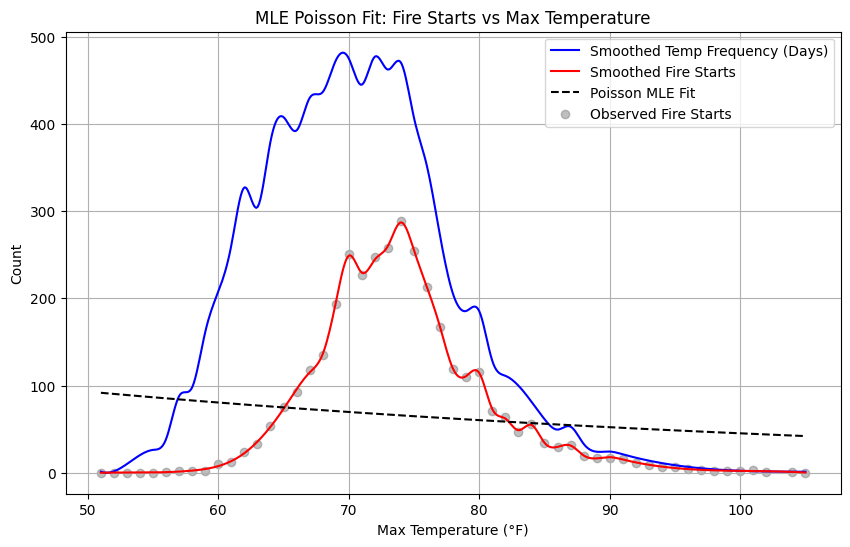

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gammaln
from scipy.interpolate import UnivariateSpline

# Assuming your df is already loaded and cleaned
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)
df['TEMP_ROUNDED'] = df['MAX_TEMP'].round()

# Group by temperature
grouped = df.groupby('TEMP_ROUNDED').agg({
    'FIRE_START_DAY': 'sum',
    'DATE': 'count'
}).rename(columns={'DATE': 'TEMP_FREQ'}).reset_index()

# Extract variables
x = grouped['TEMP_ROUNDED'].values
y_fire = grouped['FIRE_START_DAY'].values
y_freq = grouped['TEMP_FREQ'].values

# Smoothed spline curves for visualization
spline_fire = UnivariateSpline(x, y_fire, s=100)
spline_freq = UnivariateSpline(x, y_freq, s=100)

# --- MLE for Poisson regression with log link ---
# Model: FIRE_START_DAY ~ Poisson(exp(β0 + β1 * TEMP_ROUNDED))

def neg_log_likelihood(beta):
    beta0, beta1 = beta
    lambda_ = np.exp(beta0 + beta1 * x)
    # Use log-likelihood of Poisson
    log_likelihood = y_fire * (beta0 + beta1 * x) - lambda_ - gammaln(y_fire + 1)
    return -np.sum(log_likelihood)

# Initial guess
beta_init = [0.0, 0.01]
result = minimize(neg_log_likelihood, beta_init)

# MLE coefficients
beta_hat = result.x
print(f"MLE Estimates: β0 = {beta_hat[0]:.4f}, β1 = {beta_hat[1]:.4f}")

# Prediction using MLE model
x_pred = np.linspace(x.min(), x.max(), 500)
lambda_pred = np.exp(beta_hat[0] + beta_hat[1] * x_pred)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(x_pred, spline_freq(x_pred), label='Smoothed Temp Frequency (Days)', color='blue')
plt.plot(x_pred, spline_fire(x_pred), label='Smoothed Fire Starts', color='red')
plt.plot(x_pred, lambda_pred, '--', label='Poisson MLE Fit', color='black')
plt.scatter(x, y_fire, alpha=0.5, color='gray', label='Observed Fire Starts')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Count')
plt.title('MLE Poisson Fit: Fire Starts vs Max Temperature')
plt.legend()
plt.grid(True)
plt.show()
